## Observations and Insights 

## Just looking at the mean Volume of the tumor, we can tell that Capomulin & Ramicane were effective in reducing the Tumor Volume.

## Capomulin & Ramicane were the most tested drugs.

## It is safe to infer that the heavier mice will have a bigger Tumor Volume.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_complete = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
mouse_study_complete.head(10)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [2]:
# Checking the number of mice.
total_mice = mouse_study_complete["Mouse ID"].nunique()

total_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_study_complete["duplicated?"] = mouse_study_complete[["Mouse ID","Timepoint"]].duplicated()

df = mouse_study_complete[["Mouse ID","duplicated?"]].sort_values(by="duplicated?")
dff = df.loc[df["duplicated?"] == True]
dff.head(10)


,Mouse ID,duplicated?
909,g989,True
917,g989,True
915,g989,True
911,g989,True
913,g989,True


In [4]:

# Optional: Get all the data for the duplicate mouse ID. 
g989_info = mouse_study_complete.loc[mouse_study_complete["Mouse ID"] == "g989"]
g989_info


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,duplicated?
908,g989,Propriva,Female,21,26,0,45.000000,0,False
909,g989,Propriva,Female,21,26,0,45.000000,0,True
910,g989,Propriva,Female,21,26,5,48.786801,0,False
911,g989,Propriva,Female,21,26,5,47.570392,0,True
912,g989,Propriva,Female,21,26,10,51.745156,0,False
913,g989,Propriva,Female,21,26,10,49.880528,0,True
914,g989,Propriva,Female,21,26,15,51.325852,1,False
915,g989,Propriva,Female,21,26,15,53.442020,0,True
916,g989,Propriva,Female,21,26,20,55.326122,1,False
917,g989,Propriva,Female,21,26,20,54.657650,1,True


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_complete = mouse_study_complete.drop(labels=["duplicated?"], axis=1)
mouse_study_complete_clean = mouse_study_complete.drop_duplicates(subset=["Mouse ID","Timepoint"])
g989_info2 = mouse_study_complete_clean.loc[mouse_study_complete_clean["Mouse ID"] == "g989"]
g989_info2

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
912,g989,Propriva,Female,21,26,10,51.745156,0
914,g989,Propriva,Female,21,26,15,51.325852,1
916,g989,Propriva,Female,21,26,20,55.326122,1
918,g989,Propriva,Female,21,26,25,56.045564,1
919,g989,Propriva,Female,21,26,30,59.082294,1
920,g989,Propriva,Female,21,26,35,62.570880,2


In [6]:
# Checking the number of mice in the clean DataFrame.
total_mice2 = mouse_study_complete_clean["Mouse ID"].nunique()

total_mice2

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_stats = pd.DataFrame({
                "Drug Regimen": [mouse_study_complete_clean['Drug Regimen'].unique()]
                ,"Mean": [""]
                ,"Median": [""]
                ,"Variance": [""]
                ,"Standard Deviation": [""]
                ,"SEM of tumor Volume": [""]
                })

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
mean1 = mouse_study_complete_clean['Tumor Volume (mm3)'].groupby(mouse_study_complete_clean['Drug Regimen']).mean()
median1 = mouse_study_complete_clean['Tumor Volume (mm3)'].groupby(mouse_study_complete_clean['Drug Regimen']).median()
variance1 = pd.DataFrame(mouse_study_complete_clean['Tumor Volume (mm3)'].groupby(mouse_study_complete_clean['Drug Regimen']).var())
standard_dev1 = pd.DataFrame(mouse_study_complete_clean['Tumor Volume (mm3)'].groupby(mouse_study_complete_clean['Drug Regimen']).std())
SEM1 = pd.DataFrame(mouse_study_complete_clean['Tumor Volume (mm3)'].groupby(mouse_study_complete_clean['Drug Regimen']).sem())

summary_stats1= pd.merge(mean1, median1, how="right", on=["Drug Regimen"])
summary_stats1= summary_stats1.rename(columns = {"Tumor Volume (mm3)_x":"Mean","Tumor Volume (mm3)_y":"Median"})

summary_statss = pd.merge(summary_stats1, variance1, how="right", on=["Drug Regimen"])
summary_statss = summary_statss.rename(columns = {"Tumor Volume (mm3)":"Variance"})

summary_stats2 = pd.merge(standard_dev1, SEM1, how="right", on=["Drug Regimen"])
summary_stats2= summary_stats2.rename(columns = {"Tumor Volume (mm3)_x":"Standard Deviation","Tumor Volume (mm3)_y":"SEM of tumore Volume"})

summary_stats_1 = pd.merge(summary_statss, summary_stats2, how="right", on=["Drug Regimen"])
summary_stats_1

,Mean,Median,Variance,Standard Deviation,SEM of tumore Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

summary_stats_2 = mouse_study_complete_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])
summary_stats_2
# Using the aggregation method, produce the same summary statistics in a single line


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Total number of timepoints')

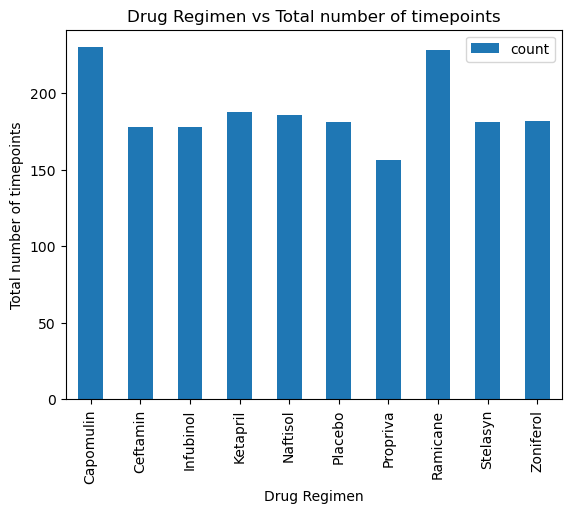

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

total_number_of_timepoints = mouse_study_complete_clean.groupby('Drug Regimen')['Mouse ID'].agg(['count'])
total_number_of_timepoints.plot.bar()

plt.title("Drug Regimen vs Total number of timepoints")
plt.ylabel("Total number of timepoints")



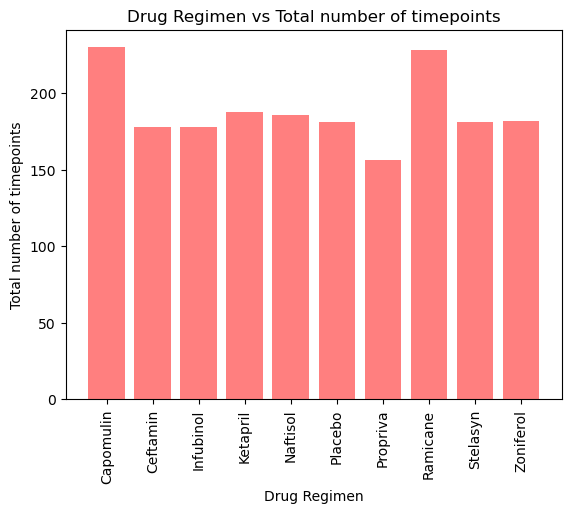

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = np.arange(len(mouse_study_complete_clean['Drug Regimen'].unique()))

plt.bar(x_axis, total_number_of_timepoints['count'], color='r', alpha=0.5, align="center")
plt.xlabel('Drug Regimen')
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, total_number_of_timepoints.index, rotation='vertical')
plt.title("Drug Regimen vs Total number of timepoints")
plt.ylabel("Total number of timepoints")
plt.show()


Text(0.5, 1.0, 'Female vs Male')

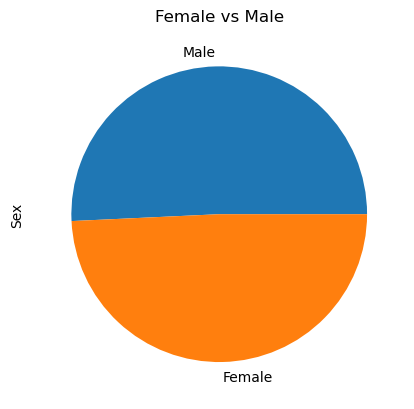

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_of_mouse = mouse_study_complete_clean['Sex'].value_counts()
sex_of_mouse.plot.pie(y='Gender')
plt.title("Female vs Male")


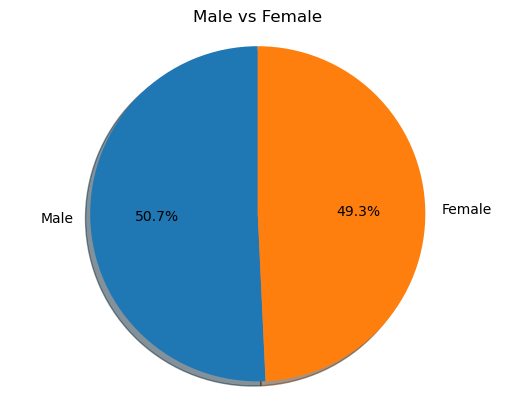

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

mag = [int(sex_of_mouse['Male']), int(sex_of_mouse['Female'])]
labels = ['Male','Female']


plt.pie(mag, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Male vs Female")
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
interest_regimens = mouse_study_complete_clean.loc[(mouse_study_complete_clean["Drug Regimen"] == "Capomulin")
                                                    |(mouse_study_complete_clean["Drug Regimen"] == "Ramicane")
                                                    |(mouse_study_complete_clean["Drug Regimen"] == "Infubinol")
                                                    |(mouse_study_complete_clean["Drug Regimen"] == "Ceftamin")
                                                    ]
# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint = mouse_study_complete_clean.groupby('Mouse ID')['Timepoint'].agg(['max'])
#greatest_timepoint = greatest_timepoint.rename(columns = {"max":"Timepoint"})

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
#tumor_v_last = interest_regimens.loc[(interest_regimens['Timepoint']== greatest_timepoint['max'])]
greatest_timepoint2= pd.merge(greatest_timepoint, interest_regimens, how="right", on=['Mouse ID'])
final_greatest = greatest_timepoint2.loc[(greatest_timepoint2['Timepoint']==greatest_timepoint2['max'])]
final_greatest = final_greatest.sort_values('Drug Regimen')
final_greatest.head(30)



,Mouse ID,max,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
317,j246,35,Capomulin,Female,21,21,35,38.753265,1
350,v923,45,Capomulin,Female,19,21,45,40.658124,2
340,w150,10,Capomulin,Male,23,23,10,39.952347,0
337,j119,45,Capomulin,Female,7,23,45,38.125164,1
380,l509,45,Capomulin,Male,17,21,45,41.483008,3
390,r944,45,Capomulin,Male,12,25,45,41.581521,2
309,b128,45,Capomulin,Female,9,22,45,38.982878,2
299,b742,45,Capomulin,Male,7,21,45,38.939633,0
705,r157,15,Capomulin,Male,22,25,15,46.539206,0
282,l897,45,Capomulin,Male,17,19,45,38.846876,1


In [14]:
final = final_greatest.drop(labels= ['max','Sex','Age_months','Weight (g)','Timepoint','Metastatic Sites'], axis=1)
final = final.sort_values('Tumor Volume (mm3)')
final

,Mouse ID,Drug Regimen,Tumor Volume (mm3)
9,k403,Ramicane,22.050126
19,s185,Capomulin,23.343598
39,m601,Capomulin,28.430964
29,x401,Capomulin,28.484033
49,g791,Ramicane,29.128472
...,...,...,...
616,l471,Ceftamin,67.748662
463,a203,Infubinol,67.973419
793,y769,Ceftamin,68.594745
588,k210,Ceftamin,68.923185


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
#treatments_tumor_vol = []
#y = final_greatest['Tumor Volume (mm3)'].loc[(final_greatest['Drug Regimen'] == 'Capomulin')]
#t_capomulin.append(y)

Capomulin = []
Ramicane = []
Infubinol = []
Ceftamin = []

for x in treatments:
    y = (final_greatest['Tumor Volume (mm3)'].loc[(final_greatest['Drug Regimen']== x)])
    quartiles_ca = y.quantile([.25,.5,.75])
    lowerq_ca = quartiles_ca[0.25]
    upperq_ca = quartiles_ca[0.75]
    iqr_ca = upperq_ca-lowerq_ca
    min_ca = y.min()
    max_ca = y.max()
    

        
    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    print(f"The interquartile range of Tumor Volume using {x} is: {iqr_ca}")
        
        # Locate the rows which contain mice on each drug and get the tumor volumes
        
        
        # add subset 
        
        
        # Determine outliers using upper and lower bounds
    lower_bound_ca = lowerq_ca - (1.5*iqr_ca)
    upper_bound_ca = upperq_ca + (1.5*iqr_ca)
    print(f"Tumor Volume using {x} below {lower_bound_ca} could be outliers.")
    print(f"Tumor Volume using {x} above {upper_bound_ca} could be outliers.\n")
    if min_ca < lower_bound_ca or max_ca > upper_bound_ca:
        z = final.loc[(final['Drug Regimen'] == x )&(final['Tumor Volume (mm3)']<lower_bound_ca)]
        print(z)
        
        a = final.loc[(final['Drug Regimen'] == x )&(final['Tumor Volume (mm3)']>upper_bound_ca)]
        print(a)
        print("\n")
    else:
        print("No outliners\n")



The interquartile range of Tumor Volume using Capomulin is: 7.781863460000004
Tumor Volume using Capomulin below 20.70456164999999 could be outliers.
Tumor Volume using Capomulin above 51.83201549 could be outliers.

No outliners

The interquartile range of Tumor Volume using Ramicane is: 9.098536719999998
Tumor Volume using Ramicane below 17.912664470000003 could be outliers.
Tumor Volume using Ramicane above 54.30681135 could be outliers.

No outliners

The interquartile range of Tumor Volume using Infubinol is: 11.477135160000003
Tumor Volume using Infubinol below 36.83290494999999 could be outliers.
Tumor Volume using Infubinol above 82.74144559000001 could be outliers.

    Mouse ID Drug Regimen  Tumor Volume (mm3)
526     c326    Infubinol           36.321346
Empty DataFrame
Columns: [Mouse ID, Drug Regimen, Tumor Volume (mm3)]
Index: []


The interquartile range of Tumor Volume using Ceftamin is: 15.577752179999997
Tumor Volume using Ceftamin below 25.355449580000002 could be ou

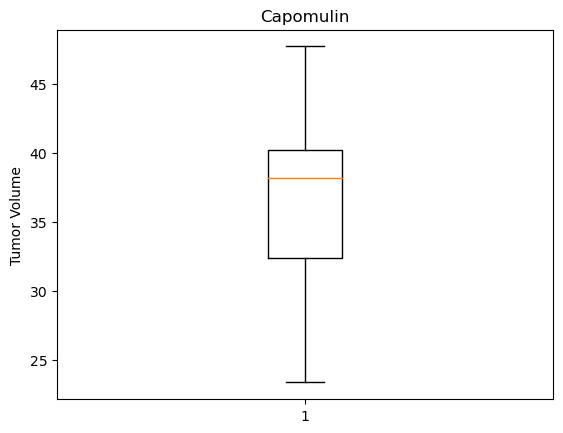

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Capomulin')
ax1.set_ylabel('Tumor Volume')
ax1.boxplot((final_greatest['Tumor Volume (mm3)'].loc[(final_greatest['Drug Regimen']== 'Capomulin')]))
plt.show()

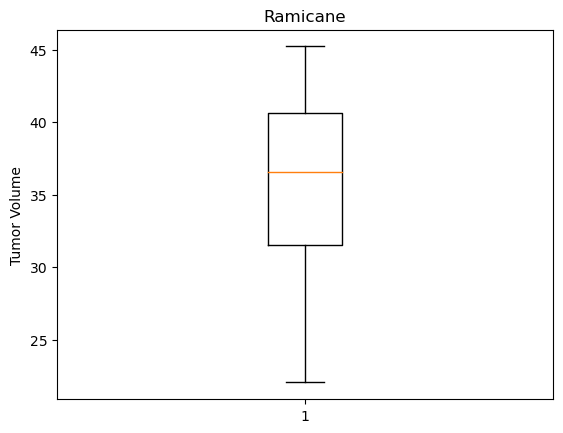

In [17]:
fig1, ax1 = plt.subplots()
ax1.set_title('Ramicane')
ax1.set_ylabel('Tumor Volume')
ax1.boxplot((final_greatest['Tumor Volume (mm3)'].loc[(final_greatest['Drug Regimen']== 'Ramicane')]))
plt.show()

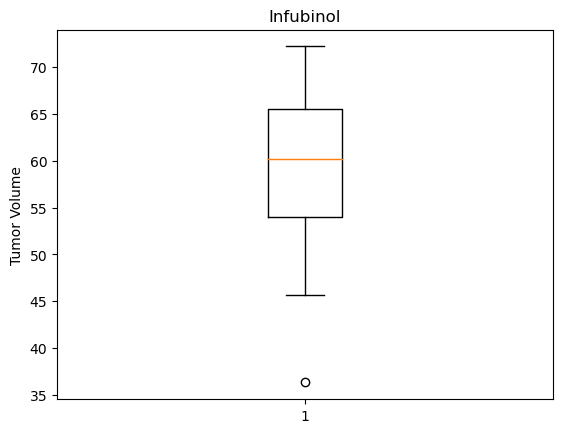

In [18]:
fig1, ax1 = plt.subplots()
ax1.set_title('Infubinol')
ax1.set_ylabel('Tumor Volume')
ax1.boxplot((final_greatest['Tumor Volume (mm3)'].loc[(final_greatest['Drug Regimen']== 'Infubinol')]))
plt.show()

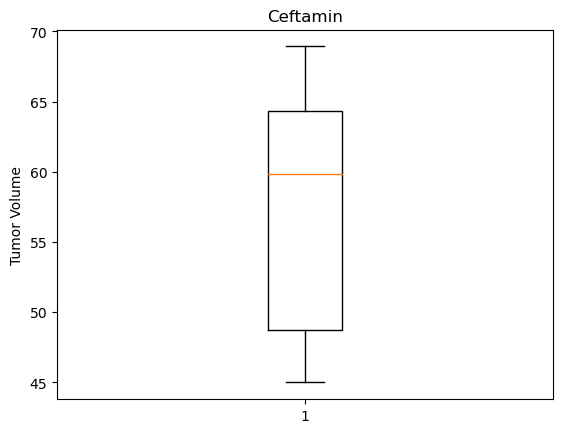

In [19]:
fig1, ax1 = plt.subplots()
ax1.set_title('Ceftamin')
ax1.set_ylabel('Tumor Volume')
ax1.boxplot((final_greatest['Tumor Volume (mm3)'].loc[(final_greatest['Drug Regimen']== 'Ceftamin')]))
plt.show()

## Line and Scatter Plots

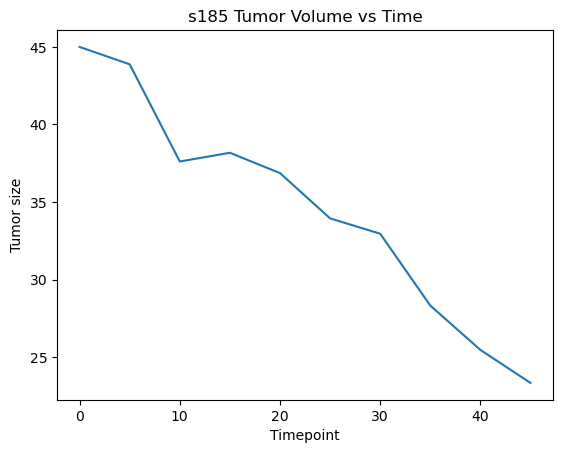

In [20]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
only_capomulin = mouse_study_complete_clean.loc[(mouse_study_complete_clean["Drug Regimen"] == "Capomulin")]
x_axis_line= only_capomulin['Timepoint'].loc[mouse_study_complete_clean['Mouse ID']== 's185']
points  = only_capomulin['Tumor Volume (mm3)'].loc[mouse_study_complete_clean['Mouse ID']== 's185']
plt.plot(x_axis_line, points)
plt.title('s185 Tumor Volume vs Time')
plt.ylabel('Tumor size')
plt.xlabel('Timepoint')
plt.show()

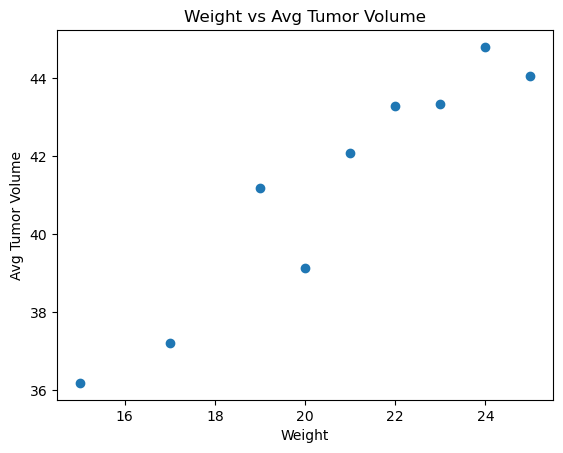

In [21]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
only_capomulin.drop(labels= ['Drug Regimen','Sex','Timepoint','Age_months','Metastatic Sites'], axis=1)
#avg_tumor_ca1 = pd.DataFrame({'Weight (g)':[15,17,19,20,21,22,23,24,25] , 'mean':['']})
#avg_tumor_ca1

avg_tumor_ca = only_capomulin.groupby('Weight (g)')['Tumor Volume (mm3)'].agg(['mean'])
avg_tumor_ca
#scatter2 = pd.concat([avg_tumor_ca1,avg_tumor_ca])
#scatter2
ca_x = [15,17,19,20,21,22,23,24,25]
ca_y = [36.182040, 37.214133, 41.182391, 39.141053, 42.088700, 43.288490, 43.341051, 44.805810, 44.062109]
plt.scatter(ca_x,ca_y)
plt.xlabel("Weight")
plt.ylabel("Avg Tumor Volume")
plt.title('Weight vs Avg Tumor Volume')
plt.show()



## Correlation and Regression

In [22]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


pe_slope, pe_intercept, rvalue, pvalue, stderr= st.linregress(ca_x, ca_y)



In [23]:
pe_fit = pe_slope * ca_x + pe_intercept

plt.scatter(ca_x,ca_y)
plt.xlabel("Weight")
plt.plot(ca_x,pe_fit,"--")
plt.ylabel("Avg Tumor Volume")
plt.title('Weight vs Avg Tumor Volume')
plt.show()

TypeError: can't multiply sequence by non-int of type 'numpy.float64'